# **Assignment : Anime Recommended System**

- 62010278 ณัฐพนธ์ สุขถาวร 
- 62010497 นิธิ น้อมประวัติ 
- 62010609 พักตร์ภูมิ ตาแพร่ 
- 62010948 สิรวิชญ์ สุขวัฒนาวิทย์ 

## **Import Libraries**

In [197]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## **Global Config**

In [198]:
sns.set_theme(style="whitegrid", palette="pastel")


class CONFIG:
    PLT_FIG_SIZE = plt.figaspect(8/19)


# color codes for python build-in print function
class PRINT_COLOR_CODE:
    BLUE = '\033[94m'
    CYAN = '\033[96m'
    GREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    ENDC = '\033[0m'


## **Define Util Functions**

In [199]:
# function to return list of columns which contained Nan value
def get_cols_contained_na(df):
    masked_na_df = df.isna()
    cols_with_na = df.columns[masked_na_df.any()].tolist()
    return cols_with_na


## **Import Datasets**

In [200]:
ANIME_CSV_PATH = "./datasets/anime.csv"
RATING_CSV_PATH = "./datasets/rating.csv"


In [201]:
anime_df = pd.read_csv(ANIME_CSV_PATH)
anime_df.rename(columns={'rating': 'average_rating'}, inplace=True)

rating_df = pd.read_csv(RATING_CSV_PATH)
rating_df.rename(columns={'rating': 'user_rating'}, inplace=True)

rating_merged_df = rating_df.merge(anime_df, on='anime_id', how='inner')

# NOTE : Careful of big file size
# rating_merged_df.to_csv('./dataExplores/rating_merged_anime.csv', index=False,  encoding='utf-8')


## **Data Exploration (1)**

### 1. **Anime Dataframe** Basic Info.

In [202]:
print(f'\n{PRINT_COLOR_CODE.FAIL}List of columns that contain NaN values : {PRINT_COLOR_CODE.WARNING}{get_cols_contained_na(anime_df)}{PRINT_COLOR_CODE.ENDC}')

anime_df



List of columns that contain NaN values : ['genre', 'type', 'average_rating']


,anime_id,name,genre,type,episodes,average_rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


,anime_id,average_rating,members
count,12294.0,12064.0,12294.0
mean,14058.2,6.5,18071.3
std,11455.3,1.0,54820.7
min,1.0,1.7,5.0
25%,3484.2,5.9,225.0
50%,10260.5,6.6,1550.0
75%,24794.5,7.2,9437.0
max,34527.0,10.0,1013917.0


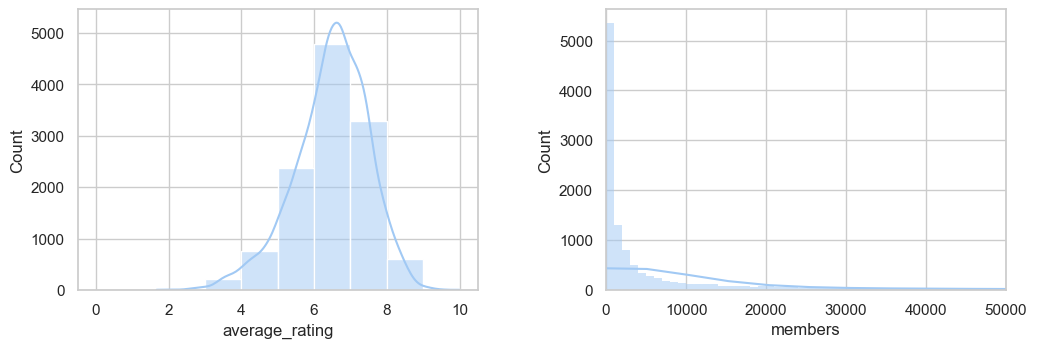

In [203]:
fig, axs = plt.subplots(ncols=2, figsize=CONFIG.PLT_FIG_SIZE)
fig.tight_layout(pad=5.0)

sns.histplot(anime_df, x='average_rating', kde=True, binwidth=1, binrange=[0, 10], ax=axs[0])

sns.histplot(anime_df, x='members', kde=True, binwidth=1e3, ax=axs[1])
axs[1].set(xlim=(0, 0.05e6))

anime_df.describe().apply(lambda s: s.apply('{0:.1f}'.format))


### 2. **Rating Dataframe** Basic info.

In [204]:
print(f'\n{PRINT_COLOR_CODE.FAIL}List of columns that contain NaN values : {PRINT_COLOR_CODE.WARNING}{get_cols_contained_na(rating_df)}{PRINT_COLOR_CODE.ENDC}')

rating_df


List of columns that contain NaN values : []


,user_id,anime_id,user_rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


,user_id,anime_id,user_rating
count,7813737.0,7813737.0,7813737.0
mean,36728.0,8909.1,6.1
std,20997.9,8883.9,3.7
min,1.0,1.0,-1.0
25%,18974.0,1240.0,6.0
50%,36791.0,6213.0,7.0
75%,54757.0,14093.0,9.0
max,73516.0,34519.0,10.0


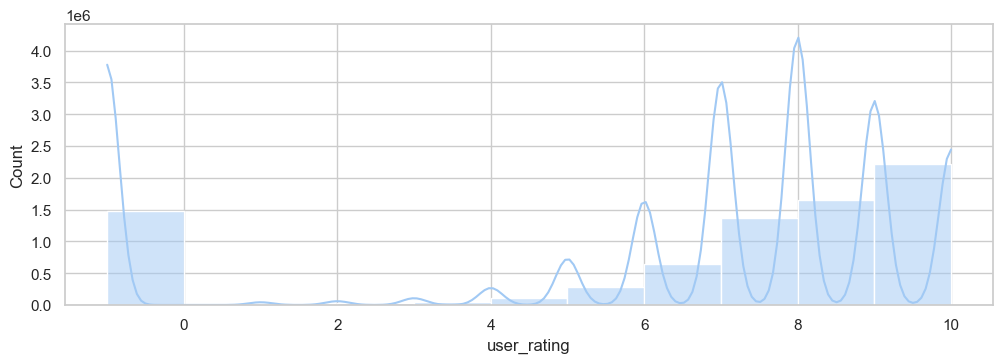

In [205]:
fig, axs = plt.subplots(ncols=1, figsize=CONFIG.PLT_FIG_SIZE)
fig.tight_layout(pad=5.0)

sns.histplot(rating_df, x='user_rating', kde=True, binwidth=1, binrange=[-1, 10], ax=axs)

rating_df.describe().apply(lambda s: s.apply('{0:.1f}'.format))

### 3. **Rating Merged Dataframe** Basic info.

In [206]:
print(f'\n{PRINT_COLOR_CODE.FAIL}List of columns that contain NaN values : {PRINT_COLOR_CODE.WARNING}{get_cols_contained_na(rating_merged_df)}{PRINT_COLOR_CODE.ENDC}')

rating_merged_df.sort_values(by=['user_id', 'anime_id'])



List of columns that contain NaN values : ['genre', 'type', 'average_rating']


,user_id,anime_id,user_rating,name,genre,type,episodes,average_rating,members
0,1,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
25925,1,24,-1,School Rumble,"Comedy, Romance, School, Shounen",TV,26,8.06,178553
33078,1,79,-1,Shuffle!,"Comedy, Drama, Ecchi, Fantasy, Harem, Magic, R...",TV,24,7.31,158772
40190,1,226,-1,Elfen Lied,"Action, Drama, Horror, Psychological, Romance,...",TV,13,7.85,623511
67696,1,241,-1,Girls Bravo: First Season,"Comedy, Ecchi, Fantasy, Harem, Romance, School",TV,11,6.69,84395
...,...,...,...,...,...,...,...,...,...
1474883,73515,16512,7,Devil Survivor 2 The Animation,"Action, Demons, Supernatural",TV,13,7.06,101266
6640957,73515,17187,9,Ghost in the Shell: Arise - Border:1 Ghost Pain,"Mecha, Police, Psychological, Sci-Fi",Movie,1,7.64,31747
4153140,73515,22145,10,Kuroshitsuji: Book of Circus,"Comedy, Demons, Fantasy, Historical, Shounen, ...",TV,10,8.37,122895
4055601,73516,790,9,Ergo Proxy,"Mystery, Psychological, Sci-Fi",TV,23,8.03,265005


In [207]:
rating_merged_df.groupby(by='type').count().sort_values(by='user_id', ascending=False).rename(columns={'user_id': 'count'})[['count']]


,count
type,
TV,5283596
Movie,1051998
OVA,800307
Special,559366
ONA,91956
Music,26500


,user_id,rated_anime_count
count,73515.0,73515.0
mean,36758.4,106.3
std,21222.5,153.1
min,1.0,1.0
25%,18379.5,18.0
50%,36758.0,57.0
75%,55137.5,136.0
max,73516.0,10226.0


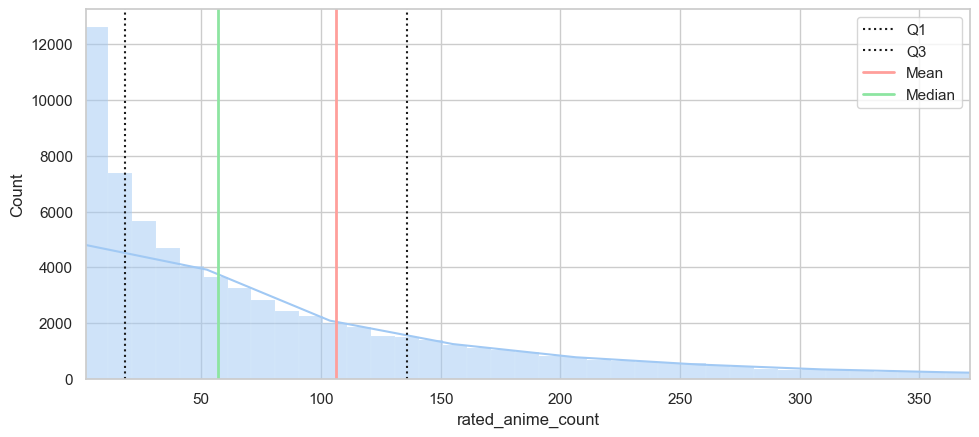

In [208]:
count_rated_by_user_df = rating_merged_df.groupby(['user_id'])[['anime_id']].count().sort_values(by='anime_id').rename(columns={'anime_id': 'rated_anime_count'}).reset_index()

fig, axs = plt.subplots(ncols=1, figsize=CONFIG.PLT_FIG_SIZE)

sns.histplot(count_rated_by_user_df, x='rated_anime_count', binwidth=10,  kde=True, ax=axs)
axs.set(xlim=(count_rated_by_user_df['rated_anime_count'].quantile(0.05), count_rated_by_user_df['rated_anime_count'].quantile(0.95)))
axs.axvline(count_rated_by_user_df['rated_anime_count'].quantile(0.25), color='k', linestyle='dotted', linewidth=1.5, label='Q1')
axs.axvline(count_rated_by_user_df['rated_anime_count'].quantile(0.75), color='k', linestyle='dotted', linewidth=1.5, label='Q3')
axs.axvline(count_rated_by_user_df['rated_anime_count'].mean(), color='r', linestyle='-', linewidth=2, label='Mean')
axs.axvline(count_rated_by_user_df['rated_anime_count'].median(), color='g', linestyle='-', linewidth=2, label='Median')
axs.legend()

count_rated_by_user_df.describe().apply(lambda s: s.apply('{0:.1f}'.format))

## **Data Cleansing (1)**

In Anime DataFrame, drop all anime types except `TV`, `Movie`, `OVA`, `Special`

In [209]:
type_except_list = ["TV", 'Movie', "OVA", "Special"] # FIXME : TUNING ME!!!

print(f"{PRINT_COLOR_CODE.FAIL}drop all anime types except {PRINT_COLOR_CODE.GREEN}{type_except_list}{PRINT_COLOR_CODE.ENDC}")

new_anime_df = anime_df[anime_df['type'].isin(type_except_list)]

drop_count = len(anime_df)-len(new_anime_df)
drop_percentage = (drop_count/len(anime_df))*100

print(f"{PRINT_COLOR_CODE.FAIL}drop {PRINT_COLOR_CODE.WARNING}{drop_count}{PRINT_COLOR_CODE.ENDC} {PRINT_COLOR_CODE.FAIL}rows{PRINT_COLOR_CODE.ENDC} ({drop_percentage:.4f}%)")

anime_df = new_anime_df

anime_df.reset_index(drop=True, inplace=True)
anime_df


drop all anime types except ['TV', 'Movie', 'OVA', 'Special']
drop 1172 rows (9.5331%)


,anime_id,name,genre,type,episodes,average_rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
11117,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
11118,5543,Under World,Hentai,OVA,1,4.28,183
11119,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
11120,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In Anime DataFrame, drop less than `{{min_n_members_threshold}}` members anime

In [210]:
min_n_members_threshold = 225  # FIXME : TUNING ME!!!

print(f"{PRINT_COLOR_CODE.FAIL}drop less than {PRINT_COLOR_CODE.WARNING}{min_n_members_threshold}{PRINT_COLOR_CODE.ENDC} {PRINT_COLOR_CODE.FAIL}members anime{PRINT_COLOR_CODE.ENDC}")

new_anime_df = anime_df[anime_df['members'] >= min_n_members_threshold]

drop_count = len(anime_df)-len(new_anime_df)
drop_percentage = (drop_count/len(anime_df))*100

print(f"{PRINT_COLOR_CODE.FAIL}drop {PRINT_COLOR_CODE.WARNING}{drop_count}{PRINT_COLOR_CODE.ENDC} {PRINT_COLOR_CODE.FAIL}rows{PRINT_COLOR_CODE.ENDC} ({drop_percentage:.4f}%)")

anime_df = new_anime_df

anime_df.reset_index(drop=True, inplace=True)
anime_df


drop less than 225 members anime
drop 2533 rows (22.7747%)


,anime_id,name,genre,type,episodes,average_rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
8584,7914,Kyuukyoku no Chef wa Oishinbo Papa,Hentai,OVA,1,5.43,262
8585,5559,Nijuusou: Wana ni Ochita Onna-tachi,Hentai,OVA,1,5.20,240
8586,34492,Nuki Doki! Tenshi to Akuma no Sakusei Battle -...,Hentai,OVA,Unknown,NaN,392
8587,34312,Saimin Class,Hentai,OVA,Unknown,NaN,240


join (inner) Rating Dataframe with Anime Dataframe `again`

In [211]:
rating_merged_df = rating_df.merge(anime_df, on='anime_id', how='inner')

rating_merged_df

,user_id,anime_id,user_rating,name,genre,type,episodes,average_rating,members
0,1,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
1,3,20,8,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
2,5,20,6,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
3,6,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
4,10,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
...,...,...,...,...,...,...,...,...,...
7691505,51693,30010,5,Frame Arms: A Violent Struggle,Mecha,OVA,1,4.22,234
7691506,53492,31071,3,"Kinyoru, Abe Reiji: Heikinteki na Salaryman no...",Comedy,TV,5,4.14,234
7691507,59537,33454,7,Kochira Katsushikaku Kameari Kouenmae Hashutsu...,"Comedy, Police, Shounen, Slice of Life",Special,1,7.77,268
7691508,63076,26123,7,Seitokai Yakuindomo* OVA,"Comedy, School, Shounen, Slice of Life",OVA,6,8.05,26361


## **Data Exploration (2)**

### 1. **Rating Merged Dataframe** Basic Info.

In [212]:
print(f'\n{PRINT_COLOR_CODE.FAIL}List of columns that contain NaN values : {PRINT_COLOR_CODE.WARNING}{get_cols_contained_na(rating_merged_df)}{PRINT_COLOR_CODE.ENDC}')

rating_merged_df


List of columns that contain NaN values : ['genre', 'average_rating']


,user_id,anime_id,user_rating,name,genre,type,episodes,average_rating,members
0,1,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
1,3,20,8,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
2,5,20,6,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
3,6,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
4,10,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
...,...,...,...,...,...,...,...,...,...
7691505,51693,30010,5,Frame Arms: A Violent Struggle,Mecha,OVA,1,4.22,234
7691506,53492,31071,3,"Kinyoru, Abe Reiji: Heikinteki na Salaryman no...",Comedy,TV,5,4.14,234
7691507,59537,33454,7,Kochira Katsushikaku Kameari Kouenmae Hashutsu...,"Comedy, Police, Shounen, Slice of Life",Special,1,7.77,268
7691508,63076,26123,7,Seitokai Yakuindomo* OVA,"Comedy, School, Shounen, Slice of Life",OVA,6,8.05,26361


,user_id,anime_id,user_rating,average_rating,members
count,7691510.0,7691510.0,7691510.0,7691508.0,7691510.0
mean,36726.6,8858.7,6.2,7.7,180872.1
std,21003.8,8872.6,3.7,0.7,188751.1
min,1.0,1.0,-1.0,2.0,225.0
25%,18963.2,1210.0,6.0,7.3,45233.0
50%,36772.0,6178.0,7.0,7.7,114217.0
75%,54773.0,14027.0,9.0,8.1,246276.0
max,73516.0,34367.0,10.0,9.4,1013917.0


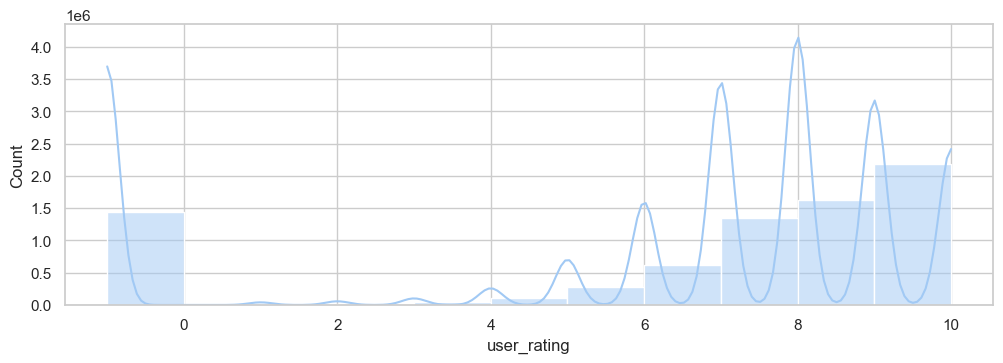

In [213]:
fig, axs = plt.subplots(ncols=1, figsize=CONFIG.PLT_FIG_SIZE)
fig.tight_layout(pad=5.0)

sns.histplot(rating_merged_df, x='user_rating', kde=True, binwidth=1, binrange=[-1, 10], ax=axs)

rating_merged_df.describe().apply(lambda s: s.apply('{0:.1f}'.format))


### 2. Compare **Anime Dataframe** vs **Rating Merged Dataframe**

In [214]:
rating_merged_droped_unrated_user_df = rating_merged_df.drop(rating_merged_df[rating_merged_df['user_rating'] < 0].index)

compare_anime_vs_rating_merged_df = rating_merged_droped_unrated_user_df.groupby(['anime_id']).agg({
    'members': 'mean',
    'user_id': 'count',
    'average_rating': 'mean',
    'user_rating': 'mean',
})
compare_anime_vs_rating_merged_df.rename(
    columns={
        'user_id': 'rating_merged: members (cal)',
        'user_rating': 'rating_merged: average_rating (cal)',
        'members': 'anime: members',
        'average_rating': 'anime: average_rating'
    },
    inplace=True)

print(f'{PRINT_COLOR_CODE.WARNING}Anime Dataframe vs Rating Merged Dataframe (droped users who have not rated anime){PRINT_COLOR_CODE.ENDC}\n')
print(f'{PRINT_COLOR_CODE.CYAN}Anime Dataframe{PRINT_COLOR_CODE.ENDC} contains {PRINT_COLOR_CODE.GREEN}{anime_df.shape[0]}{PRINT_COLOR_CODE.ENDC} unique animes')
print(f'{PRINT_COLOR_CODE.CYAN}Rating Merged Dataframe (droped users who have not rated anime){PRINT_COLOR_CODE.ENDC} contains {PRINT_COLOR_CODE.GREEN}{compare_anime_vs_rating_merged_df.shape[0]}{PRINT_COLOR_CODE.ENDC} unique animes')

compare_anime_vs_rating_merged_df


Anime Dataframe vs Rating Merged Dataframe (droped users who have not rated anime)

Anime Dataframe contains 8589 unique animes
Rating Merged Dataframe (droped users who have not rated anime) contains 8148 unique animes


,anime: members,rating_merged: members (cal),anime: average_rating,rating_merged: average_rating (cal)
anime_id,,,,
1,486824.0,13449,8.82,8.869433
5,137636.0,5790,8.40,8.439724
6,283069.0,9385,8.32,8.419393
7,64905.0,2169,7.36,7.533426
8,9848.0,308,7.06,7.198052
...,...,...,...,...
34238,2525.0,27,7.55,7.962963
34283,937.0,13,6.74,6.615385
34325,1454.0,15,7.05,7.333333


## **Data Cleansing (2)**

In Rating Merged DataFrame, replace all instances of `user_rating` with `average_rating` for rows where user_rating == -1 (unrated anime).

In [215]:
# rating_merged_df['user_rating'] = rating_merged_df.apply(lambda x: x['user_rating'] if x['user_rating'] > -1 else x['average_rating'], axis=1)

# rating_merged_df.reset_index(drop=True, inplace=True)
# rating_merged_df


## **Data Exploration (3)**

### 1. Compare **Anime Dataframe** vs **Rating Merged Dataframe**

In [216]:
# NOTE : SAME AS ABOVE
# rating_merged_replaced_unrated_user_df = rating_merged_df.drop(rating_merged_df[rating_merged_df['user_rating'] < 0].index)

# compare_anime_vs_rating_merged_df = rating_merged_replaced_unrated_user_df.groupby(['anime_id']).agg({
#     'members': 'mean',
#     'user_id': 'count',
#     'average_rating': 'mean',
#     'user_rating': 'mean',
# })
# compare_anime_vs_rating_merged_df.rename(
#     columns={
#         'user_id': 'rating_merged: members (cal)',
#         'user_rating': 'rating_merged: average_rating (cal)',
#         'members': 'anime: members',
#         'average_rating': 'anime: average_rating'
#     },
#     inplace=True)

# print(f'{PRINT_COLOR_CODE.WARNING}Anime Dataframe vs Rating Merged Dataframe (after assigning average rating intead of user rating for users who have not rated anime){PRINT_COLOR_CODE.ENDC}\n')
# print(f'{PRINT_COLOR_CODE.CYAN}Anime Dataframe{PRINT_COLOR_CODE.ENDC} contains {PRINT_COLOR_CODE.GREEN}{anime_df.shape[0]}{PRINT_COLOR_CODE.ENDC} unique animes')
# print(f'{PRINT_COLOR_CODE.CYAN}Rating Merged Dataframe (after assigning average rating intead of user rating for users who have not rated anime){PRINT_COLOR_CODE.ENDC} contains {PRINT_COLOR_CODE.GREEN}{compare_anime_vs_rating_merged_df.shape[0]}{PRINT_COLOR_CODE.ENDC} unique animes')

# compare_anime_vs_rating_merged_df


### 2. **Anime Dataframe** Top 10 Members and Top 10 Average Rating

[Text(0, 0, 'Kimi no Na wa.'),
 Text(1, 0, 'Fullmetal Alchemist: Brotherhood'),
 Text(2, 0, 'Gintama°'),
 Text(3, 0, 'Steins;Gate'),
 Text(4, 0, 'Gintama&#039;'),
 Text(5, 0, 'Haikyuu!!: Karasuno Koukou VS Shiratorizawa Gakuen Koukou'),
 Text(6, 0, 'Hunter x Hunter (2011)'),
 Text(7, 0, 'Ginga Eiyuu Densetsu'),
 Text(8, 0, 'Gintama&#039;: Enchousen'),
 Text(9, 0, 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare')]

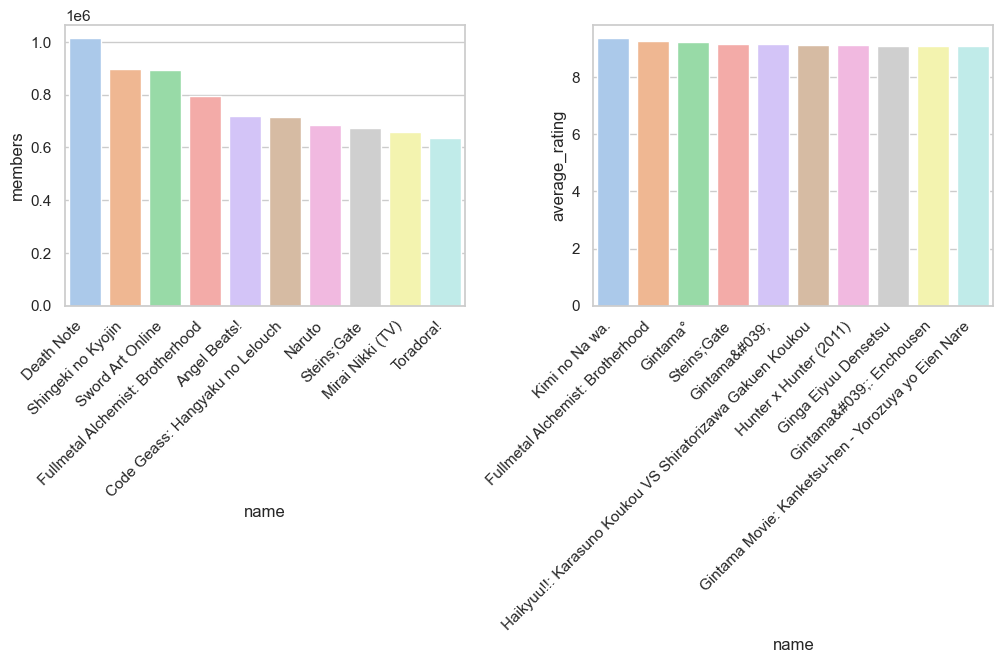

In [217]:
anime_top_10_members_df = anime_df.sort_values(by='members', ascending=False).head(10)
anime_top_10_rating_df = anime_df.sort_values(by='average_rating', ascending=False).head(10)

fig, axs = plt.subplots(ncols=2, figsize=CONFIG.PLT_FIG_SIZE)
fig.tight_layout(pad=5.0)

plt_0 = sns.barplot(data=anime_top_10_members_df, x='name', y='members', ax=axs[0])
plt_0.set_xticklabels(plt_0.get_xticklabels(),rotation=45, horizontalalignment='right')

plt_1 = sns.barplot(data=anime_top_10_rating_df, x='name',y='average_rating',  ax=axs[1])
plt_1.set_xticklabels(plt_1.get_xticklabels(),rotation=45, horizontalalignment='right')


## **Recommended System (Content-based filtering)**

### 1. **Import Libraries**

In [218]:
import nltk


### 2. **Config**

In [219]:
stopwords = nltk.corpus.stopwords.words("english")
nltk.download("stopwords")


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/phukphoom/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### 3. **Define Util Functions**

In [220]:
# function to return list of keywords from the input text
def get_keywords(input_text, split_method=False):
    if input_text is np.NaN:
        return []

    if split_method:
        return input_text.replace(' ', '').split(',')
    else:
        input_text = input_text.lower()

        input_text = ''.join(
            [char for char in input_text if char.isalpha() or char.isspace()])

        return [ele for ele in input_text.split() if ele not in stopwords]


# funtions to return the jaccard similarity between two lists
def jaccard_similarity(x, y):
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))

    if (union_cardinality == 0):
        print(union_cardinality, x, y)

    return intersection_cardinality/float(union_cardinality)


### 4. **Implmenting Core**

In [221]:
class ContentBasedFiltering:
    # FIXME : TUNING ME!!!
    WEIGHT_AVG_RATING = 0.75
    WEIGHT_GENRE = 0.25

    def __init__(self, ctb_anime_df):
        self.anime_df = ctb_anime_df.copy()

    def suggest(self, n, picked_anime_id, debug=False):
        if self.anime_df[self.anime_df['anime_id'] == picked_anime_id].empty:
            raise ValueError('Not found picked anime id ({picked_anime_id}) in self.anime_df')
        
        picked_anime_name = self.anime_df[self.anime_df['anime_id']==picked_anime_id]['name'].tolist()[0]
        picked_anime_keywords = {
            'genre': get_keywords(self.anime_df[self.anime_df['anime_id'] == picked_anime_id]['genre'].tolist()[0], split_method=True),
        }
 
        if debug:
            print(f"Picked Anime Name : {PRINT_COLOR_CODE.GREEN}{picked_anime_name}{PRINT_COLOR_CODE.ENDC}\n")
            print(f'(Weight Genre : {ContentBasedFiltering.WEIGHT_GENRE}) Selected Anime Keywords (genre) : {PRINT_COLOR_CODE.WARNING}{picked_anime_keywords["genre"]}{PRINT_COLOR_CODE.ENDC}\n')
            

        self.anime_df['keywords_genre'] = self.anime_df.apply(lambda x: get_keywords(x['genre'], split_method=True), axis=1)

        self.anime_df['ranking_score'] = self.anime_df.apply(
            lambda x: (ContentBasedFiltering.WEIGHT_AVG_RATING) * x['average_rating']/float(10) 
            + (ContentBasedFiltering.WEIGHT_GENRE) * jaccard_similarity(picked_anime_keywords['genre'], x['keywords_genre'])
        , axis=1)

        return self.anime_df[self.anime_df['anime_id'] != picked_anime_id].sort_values(by='ranking_score', ascending=False).head(n)


### 5. **Evaluation**

In [222]:
anime_suggestion_size = 10


In [240]:
min_n_animes_threshold = 18
max_n_animes_threshold = 136

user_selection_size = 2000

count_rated_by_user_trimed_df = count_rated_by_user_df[(min_n_animes_threshold <= count_rated_by_user_df['rated_anime_count']) & (count_rated_by_user_df['rated_anime_count'] <= max_n_animes_threshold)]

print(f'select {PRINT_COLOR_CODE.GREEN}{user_selection_size}{PRINT_COLOR_CODE.ENDC} users from {len(count_rated_by_user_trimed_df)} users who have seen {min_n_animes_threshold} - {max_n_animes_threshold} animes')

# Calculate weights for each element based on its position in the data
weights = np.arange(len(count_rated_by_user_trimed_df)) + 1
weights = weights / np.sum(weights)
weights = np.flip(weights)

user_selection_size = min(len(count_rated_by_user_trimed_df), user_selection_size)

selected_user_ids = np.random.choice(count_rated_by_user_trimed_df['user_id'], size=user_selection_size, p=weights, replace=False )

print(f'select {PRINT_COLOR_CODE.GREEN}{user_selection_size}{PRINT_COLOR_CODE.ENDC} users from {len(count_rated_by_user_trimed_df)} users who have seen {min_n_animes_threshold} - {max_n_animes_threshold} animes (actual)')

print(f'{PRINT_COLOR_CODE.WARNING}selected user ids (for evaluation) : \n{PRINT_COLOR_CODE.CYAN}{selected_user_ids}{PRINT_COLOR_CODE.ENDC}')


select 500 users from 37220 users who have seen 18 - 136 animes
select 500 users from 37220 users who have seen 18 - 136 animes (actual)
selected user ids (for evaluation) : 
[ 9654 47274  7634 37146 60552 15602 26510 25898 28359 30121 56572 73364
 38501 27599  1406 11462 24631  3335 49395  9265 34766 29995 55696 53778
 63457  3097 39475 41541 36687 50843 22806 13538 12852 46702  9053 64474
  6260 25347 45435  6235 44899 51128 70007 67557 25412 60963 37941  2234
 72192 65207 30153 15868 54633 21009 52748 64847 43157 14898 35629 69937
   887 36625 36590 16222 38678 47070  4017 15066 11998 68635  1012 36329
 28452 30880 24259 32292 46005 41072 33188 36013 59194 72223 68650 37999
 47323 72691 61387 55492  3956 63557 10620 57813 26981  6749 29135 39613
 11970 47959  9126  2419 22916 22274 38916 12577 18815 38281 15968 63146
 28316 33029 30729 10480  4978 32654 15608 72207 60100 42108 51261  8733
   487 12292 28912 28212   678  1527 16029 49796  3491 51308 50654 71648
 52107 30538 67539 676

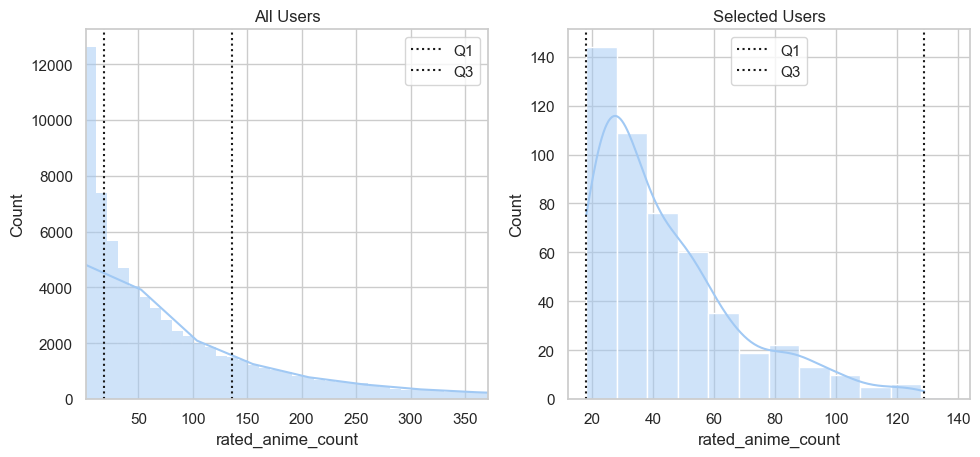

In [245]:
count_rated_by_selected_user_df = count_rated_by_user_df[count_rated_by_user_df['user_id'].isin(selected_user_ids)]

fig, axs = plt.subplots(ncols=2, figsize=CONFIG.PLT_FIG_SIZE)

sns.histplot(count_rated_by_user_df, x='rated_anime_count', binwidth=10,  kde=True, ax=axs[0])
axs[0].set(xlim=(count_rated_by_user_df['rated_anime_count'].quantile(0.05), count_rated_by_user_df['rated_anime_count'].quantile(0.95)))
axs[0].axvline(count_rated_by_user_df['rated_anime_count'].quantile(0.25), color='k', linestyle='dotted', linewidth=1.5, label='Q1')
axs[0].axvline(count_rated_by_user_df['rated_anime_count'].quantile(0.75), color='k', linestyle='dotted', linewidth=1.5, label='Q3')
axs[0].set_title("All Users")
axs[0].legend()

sns.histplot(count_rated_by_selected_user_df, x='rated_anime_count', binwidth=10,  kde=True, ax=axs[1])
axs[1].axvline(count_rated_by_selected_user_df['rated_anime_count'].quantile(0), color='k', linestyle='dotted', linewidth=1.5, label='Q1')
axs[1].axvline(count_rated_by_selected_user_df['rated_anime_count'].quantile(1), color='k', linestyle='dotted', linewidth=1.5, label='Q3')
axs[1].set_title("Selected Users")
axs[1].legend()

#### 5.1. **Evaluation** using **Top-K Precision**

In [225]:
k = 5

print(f'Evaluation using {PRINT_COLOR_CODE.BOLD}{PRINT_COLOR_CODE.GREEN}Top-{k} Precision{PRINT_COLOR_CODE.ENDC}')


Evaluation using Top-5 Precision


In [226]:
avg_top_k_score_by_time_list = []
sum_top_k_score = 0
for selected_user_id in selected_user_ids:
    selected_user_rating_merged_df = rating_merged_df[rating_merged_df['user_id'] == selected_user_id]
    selected_user_rating_merged_df.reset_index(drop=True, inplace=True)

    selected_anime_id = np.random.choice(selected_user_rating_merged_df['anime_id'].unique(), size=1)[0]

    # print(
    #     f'\nTest by having user_id:{selected_user_id} pick anime_id:{selected_anime_id}'
    # )

    core = ContentBasedFiltering(anime_df)
    ctb_suggestion_df = core.suggest(n=anime_suggestion_size, picked_anime_id=selected_anime_id)

    top_k_score = len(set.intersection(*[set(ctb_suggestion_df['anime_id'].head(k)), set(selected_user_rating_merged_df['anime_id'])]))/float(k)

    # print(
    #     f'top_k_score : {top_k_score:.4f} (k = {k}, Suggest {len(ctb_suggestion_df)} animes, Answer {len(selected_user_rating_merged_df)-1} animes)'
    # )

    sum_top_k_score += top_k_score
    avg_top_k_score_by_time_list.append(sum_top_k_score/float(len(avg_top_k_score_by_time_list)+1))

print(f'\n{PRINT_COLOR_CODE.WARNING}avg_top_k_score : {PRINT_COLOR_CODE.GREEN}{avg_top_k_score_by_time_list[-1]}{PRINT_COLOR_CODE.ENDC}')



avg_top_k_score : 0.1304000000000002


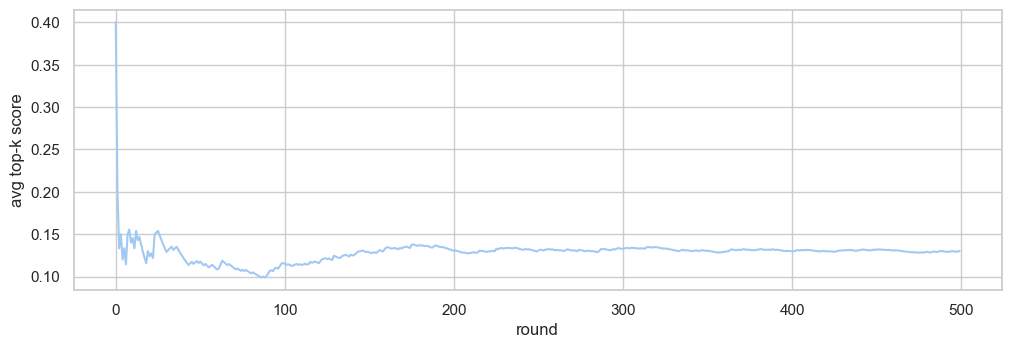

In [227]:
fig, axs = plt.subplots(ncols=1, figsize=CONFIG.PLT_FIG_SIZE)
fig.tight_layout(pad=5.0)

plt_0 = sns.lineplot(avg_top_k_score_by_time_list, ax=axs).set(xlabel='round', ylabel='avg top-k score')


#### 5.2. **Evaluation** using **AUC**

In [228]:
avg_auc_score_by_time_list = []
sum_auc_score = 0

for selected_user_id in selected_user_ids:
    selected_user_rating_merged_df = rating_merged_df[rating_merged_df['user_id'] == selected_user_id]
    selected_user_rating_merged_df.reset_index(drop=True, inplace=True)

    selected_anime_id = np.random.choice(selected_user_rating_merged_df['anime_id'].unique(), size=1)[0]

    # print(
    #     f'\nTest by having user_id:{selected_user_id} pick anime_id:{selected_anime_id}'
    # )

    core = ContentBasedFiltering(anime_df)
    core.suggest(n=anime_suggestion_size, picked_anime_id=selected_anime_id)

    ctb_anime_actual_interect_df = core.anime_df[core.anime_df['anime_id'].isin(selected_user_rating_merged_df['anime_id'])].copy()
    ctb_anime_not_interect_df = core.anime_df[~core.anime_df['anime_id'].isin(selected_user_rating_merged_df['anime_id'])].copy()

    auc_score = 0

    n = len(ctb_anime_actual_interect_df) * len(ctb_anime_not_interect_df)

    ctb_anime_actual_interect_df['n_prime'] = ctb_anime_actual_interect_df.apply(lambda x: len(ctb_anime_not_interect_df[x['ranking_score'] > ctb_anime_not_interect_df['ranking_score']]), axis=1)
    ctb_anime_actual_interect_df['n_prime_2'] = ctb_anime_actual_interect_df.apply(lambda x: len(ctb_anime_not_interect_df[x['ranking_score'] == ctb_anime_not_interect_df['ranking_score']]), axis=1)

    n_prime = ctb_anime_actual_interect_df['n_prime'].sum()
    n_prime_2 = ctb_anime_actual_interect_df['n_prime_2'].sum()

    auc_score = (n_prime + (0.5 * n_prime_2)) / n

    # print(
    #     f'auc_score : {auc_score:.4f} (n = {n}, n\' = {n_prime} , n\" = {n_prime_2}) (actual_interect : {len(ctb_anime_actual_interect_df)}, not_interect : {len(ctb_anime_not_interect_df)})'
    # )

    sum_auc_score += auc_score
    avg_auc_score_by_time_list.append(sum_auc_score/float(len(avg_auc_score_by_time_list)+1))

print(f'\n{PRINT_COLOR_CODE.WARNING}avg_auc_score : {PRINT_COLOR_CODE.GREEN}{avg_auc_score_by_time_list[-1]}{PRINT_COLOR_CODE.ENDC}')


avg_auc_score : 0.8412178480258112


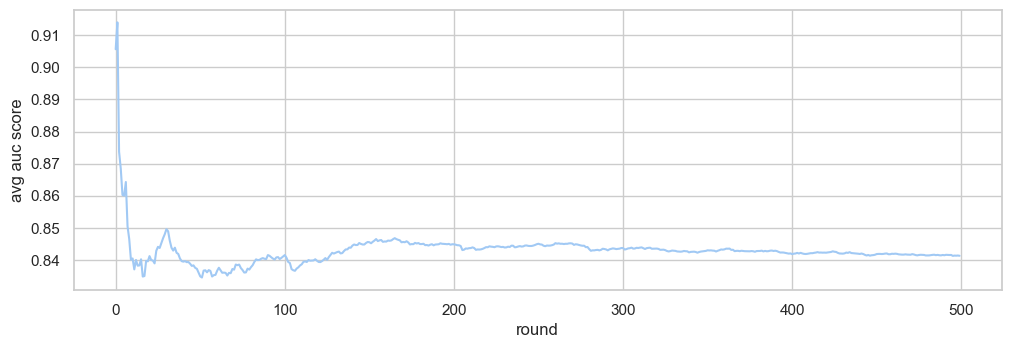

In [229]:
fig, axs = plt.subplots(ncols=1, figsize=CONFIG.PLT_FIG_SIZE)
fig.tight_layout(pad=5.0)

plt_0 = sns.lineplot(avg_auc_score_by_time_list, ax=axs).set(xlabel='round', ylabel='avg auc score')


### **6. Try Suggestion** using **Content-based filtering**

In [230]:
core = ContentBasedFiltering(anime_df)

ctb_suggestion_df = core.suggest(n=10, picked_anime_id=4224, debug=True)

ctb_suggestion_df


Picked Anime Name : Toradora!

(Weight Genre : 0.25) Selected Anime Keywords (genre) : ['Comedy', 'Romance', 'School', 'SliceofLife']



,anime_id,name,genre,type,episodes,average_rating,members,keywords_genre,ranking_score
662,21405,Bokura wa Minna Kawaisou,"Comedy, Romance, School, Slice of Life",TV,12,7.90,159793,"[Comedy, Romance, School, SliceofLife]",0.84250
912,24913,Bokura wa Minna Kawaisou: Hajimete no,"Comedy, Romance, School, Slice of Life",Special,1,7.76,20622,"[Comedy, Romance, School, SliceofLife]",0.83200
158,13759,Sakurasou no Pet na Kanojo,"Comedy, Drama, Romance, School, Slice of Life",TV,24,8.40,380375,"[Comedy, Drama, Romance, School, SliceofLife]",0.83000
1005,23701,Toradora! OVA,"Comedy, Romance, School, Slice of Life",OVA,1,7.72,25154,"[Comedy, Romance, School, SliceofLife]",0.82900
97,10165,Nichijou,"Comedy, School, Slice of Life",TV,26,8.52,254436,"[Comedy, School, SliceofLife]",0.82650
1225,11235,Amagami SS+ Plus,"Comedy, Romance, School, Slice of Life",TV,13,7.61,73813,"[Comedy, Romance, School, SliceofLife]",0.82075
1289,20541,Mikakunin de Shinkoukei,"Comedy, Romance, School, Slice of Life",TV,12,7.59,133385,"[Comedy, Romance, School, SliceofLife]",0.81925
1319,8676,Amagami SS,"Comedy, Romance, School, Slice of Life",TV,25,7.57,157223,"[Comedy, Romance, School, SliceofLife]",0.81775
1429,11553,Toradora!: Bentou no Gokui,"Comedy, Romance, School, Slice of Life",Special,1,7.54,71433,"[Comedy, Romance, School, SliceofLife]",0.81550
189,31715,Working!!!: Lord of the Takanashi,"Comedy, Romance, Slice of Life",Special,1,8.34,31856,"[Comedy, Romance, SliceofLife]",0.81300


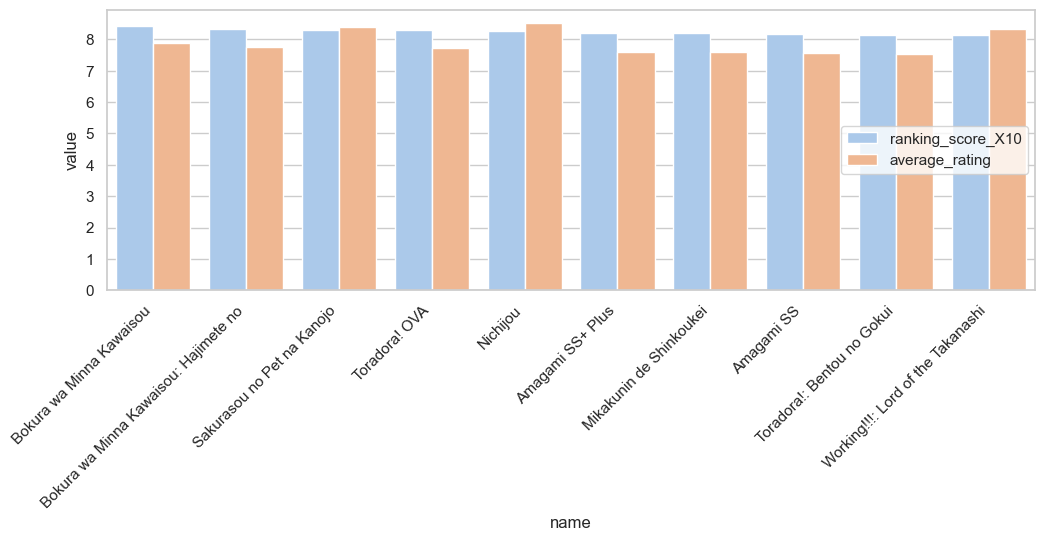

In [231]:
fig, axs = plt.subplots(ncols=1, figsize=CONFIG.PLT_FIG_SIZE)
fig.tight_layout(pad=5.0)

ctb_suggestion_df["ranking_score_X10"] = ctb_suggestion_df["ranking_score"] * 10
tidy = ctb_suggestion_df.melt(id_vars='name', value_vars=['ranking_score_X10', 'average_rating'])

plt_0 = sns.barplot(data=tidy, x='name', y='value', hue="variable", ax=axs)
plt_0.set_xticklabels(plt_0.get_xticklabels(), rotation=45, horizontalalignment='right')
plt_0.legend(loc='right')


## **Recommended System (Collaborative filtering)**

MAE (Mean Absolute Error)
- MAE = 1/n * Σ |y - y^|

Top-K
- Top-K = N/K

AUC
- AUC = (n'+0.5n") / n